Options Pricing Direct Machine Learning Method (Relative Target) - (AOP-EOP/AOP)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost
import catboost
import optuna
import sklearn

In [ ]:
# Reading files from the github repo Direct Method 
columns = ['asset_price', 'maturity', 'rate', 'div', 'ivol', 'european_op', 'american_op'] 
df = pd.read_csv('/Users/nazymazimbayev/Documents/git-projects/dataoptions/DataIn/V2.csv')
df.columns = columns
df['target'] = (df['american_op'] - df['european_op'])/df['american_op']

df = df.drop(['american_op'], axis=1)
df.head(10)


,asset_price,maturity,rate,div,ivol,european_op,target
0,113.935171,0.285741,0.008467,0.023575,0.538127,6.612110,-4.234020e-07
1,98.305405,0.813916,0.019547,0.018027,0.048863,2.601042,9.821700e-03
2,109.189731,0.713558,0.022951,0.015280,0.303538,6.397872,5.111819e-03
3,83.402084,2.879962,0.042272,0.058719,0.163288,20.609465,1.406882e-02
4,127.549831,0.907992,0.026664,0.017533,0.562713,12.093558,5.152397e-03
5,85.411375,0.467677,0.003564,0.097180,0.102791,18.220903,1.224572e-08
6,105.079869,0.371638,0.020712,0.061659,0.125093,1.643791,1.085923e-05
7,86.772793,0.776712,0.042545,0.030901,0.072937,12.075848,8.704137e-02
8,84.866348,0.267068,0.039880,0.005506,0.341140,15.880451,1.697458e-02
9,74.561803,0.611542,0.017512,0.028198,0.269032,26.265022,3.277109e-04


In [ ]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (95432, 7)
Unseen Data For Predictions (5023, 7)


In [ ]:
# Model 1 RT with ordinary features data preparation
from pycaret.regression import *
exp_model_dm_rt = setup(data = data, target = 'target', session_id=111, train_size = 0.95, 
                        normalize = True)

,Description,Value
0,session_id,111
1,Target,target
2,Original Data,"(95432, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(90660, 6)"


In [ ]:
top3 = compare_models(n_select = 3, exclude=['et','rf'])

In [ ]:
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_mae_model = automl(optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0027,0.0001,0.0075,0.9893,0.0060,43141578.3804
1,0.0027,0.0001,0.0085,0.9855,0.0063,19435540.9363
2,0.0026,0.0000,0.0068,0.9910,0.0054,30616945.9351
3,0.0027,0.0000,0.0067,0.9917,0.0055,45606238.2666
4,0.0025,0.0000,0.0063,0.9925,0.0050,117887825.9060
5,0.0025,0.0000,0.0068,0.9911,0.0053,64846857.3451
6,0.0027,0.0001,0.0076,0.9871,0.0058,20087554.1743
7,0.0025,0.0000,0.0062,0.9912,0.0053,32891314.1832
8,0.0026,0.0000,0.0067,0.9916,0.0054,278155314.6617


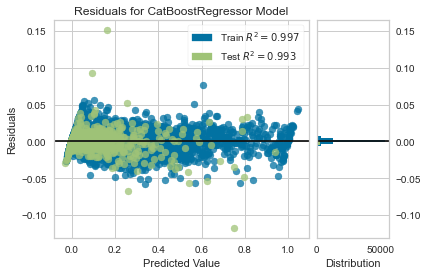

In [ ]:
plot_model(best_mae_model)

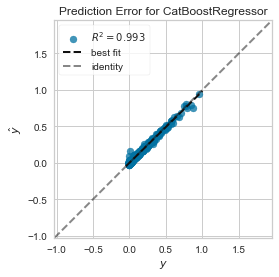

In [ ]:
plot_model(best_mae_model, plot = 'error')

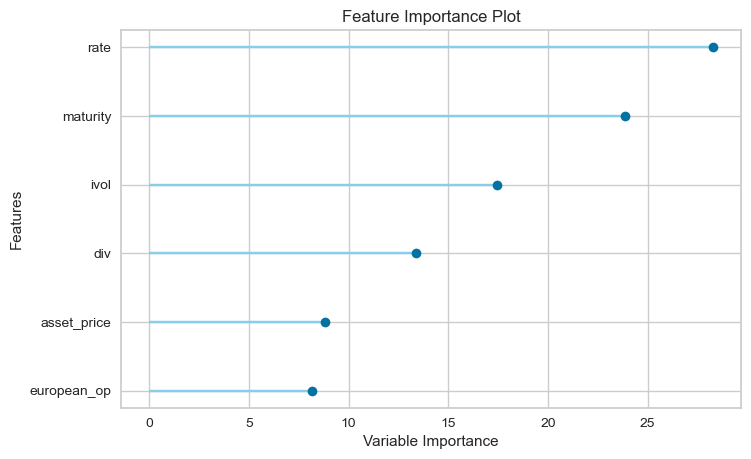

In [ ]:
plot_model(top3[0], plot='feature')

In [ ]:
print(best_mae_model)

In [ ]:
save_model(best_mae_model, 'best_mae_model_rt_with ordinary_features')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='target')),
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_m

In [ ]:
final_best_model = finalize_model(best_mae_model)
print(final_best_model)

In [ ]:
predict_model(final_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0021,0.0000,0.0039,0.9969,0.0035,78278192.2104


,asset_price,maturity,rate,div,ivol,european_op,target,Label
0,0.224365,-0.541883,-0.645378,0.313408,-1.308352,-1.142603,4.249136e-06,-0.000593
1,0.403940,-0.661424,-0.200822,0.975915,0.234536,-0.759502,1.197551e-05,-0.000211
2,-0.837990,-0.223944,-1.108716,0.023361,0.236800,0.810903,-1.569466e-06,-0.000766
3,-0.086236,-0.656707,-0.494535,0.530583,-0.087977,-0.513712,6.933262e-07,0.000821
4,-0.202425,-0.677001,-0.492675,-1.322960,-0.712484,-0.730750,1.276849e-02,0.013705
...,...,...,...,...,...,...,...,...
4767,-1.157945,-0.878251,-1.416888,-0.379758,1.118035,0.637235,1.975010e-08,-0.000464
4768,-1.159600,0.578149,-1.219109,-0.227946,-1.085921,1.001592,5.678621e-07,-0.003464
4769,-1.377279,-0.787999,-0.227038,-1.206519,0.803894,0.951174,8.365264e-03,0.008161
4770,1.054029,1.074020,-0.944667,-0.030634,0.865629,0.985007,8.137928e-04,0.001139


In [ ]:
unseen_predictions = predict_model(final_best_model, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0025,0.0000,0.0062,0.9915,0.0049,32925265.9243


,asset_price,maturity,rate,div,ivol,european_op,target,Label
0,85.411375,0.467677,0.003564,0.097180,0.102791,18.220903,1.224572e-08,-0.000848
1,86.928069,0.701853,0.029514,0.038928,0.018545,13.364723,-5.746530e-12,0.003746
2,106.802615,0.665436,0.007637,0.020037,0.238684,5.340597,8.098441e-06,0.000184
3,74.557547,0.680546,0.024866,0.002517,0.103077,23.893106,6.089382e-02,0.066348
4,113.842459,4.721544,0.025811,0.044534,0.271343,19.143581,9.484408e-03,0.007910


In [ ]:
all_predictions = predict_model(final_best_model, data=df)

In [ ]:
all_predictions['american_op'] =  all_predictions['european_op'] / (1 - all_predictions['Label']) 

In [ ]:
all_predictions.head()

In [ ]:
# MSE between columns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE =", mean_squared_error(all_predictions['american_op'], all_predictions['predicted_american_op']))
print("MAE =", mean_absolute_error(all_predictions['american_op'], all_predictions['predicted_american_op']))

In [ ]:
#all predictions to csv
all_predictions.to_csv('/Users/nazymazimbayev/Documents/git-projects/dataoptions/DataOut/all_predictions(direct_method_relative_target).csv')